<font size="6">Paso 1. Descargar los datos</font>

In [1]:
#Importamos las librerias
import pandas as pd
#Accedemos al dataset
df = pd.read_csv('/datasets/gym_churn_us.csv')

<font size="6">Paso 2. Llevar a cabo el análisis exploratorio de datos (EDA)</font>

In [2]:
#Observamos el tamaño del dataframe
print(df.shape)
#Observamos las primeras lineas
print(df.head())
#Damos un vistazo a su informacion
df.info()
#Estudiamos los valores promedio y la desviacion estandar
df.describe()

(4000, 14)
   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_m

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


-Observamos que la cantidad de hombres y mujeres es bastante similar, con una media de 0.51.
-LLama la atencion que churn tiene una media de 0.26, esto nos dice que el 26% de los usuarios han cancelado.
-La media de edad es de
-29 años.
-Los cargos extra promedio del mes no parecen ser similares entre los usuarios, pues presentan una desviacion media bastante alta.

In [3]:
df.groupby('Churn').mean(numeric_only=True)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


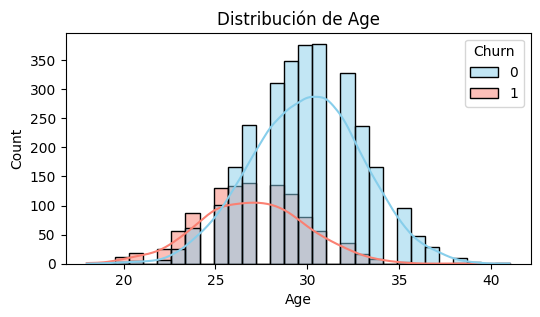

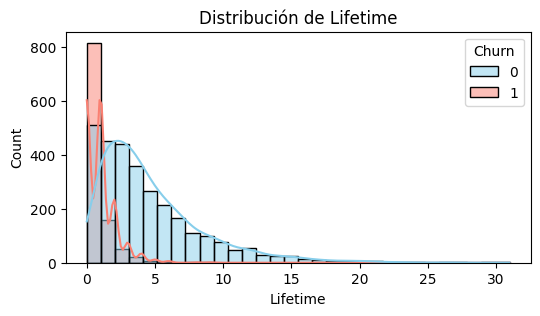

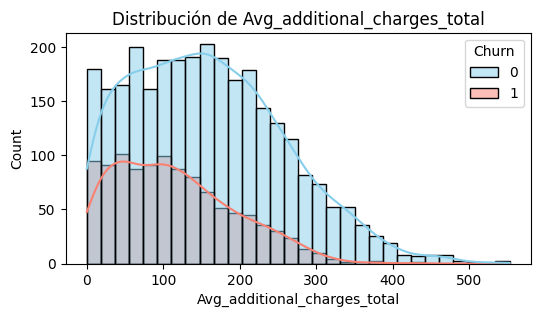

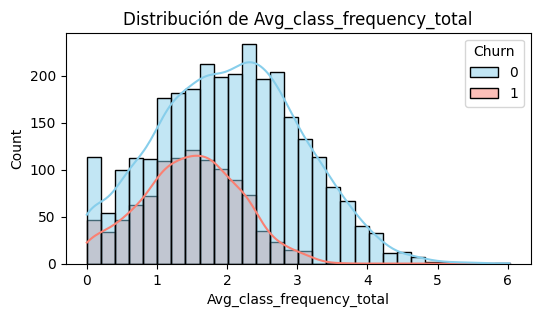

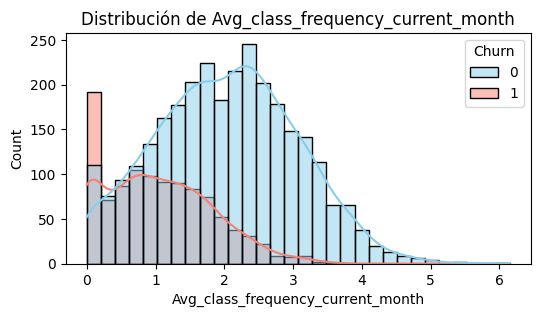

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Age', 'Lifetime', 'Avg_additional_charges_total', 
                   'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
palette = {0: "skyblue", 1: "salmon"}
for col in columns_to_plot:
    plt.figure(figsize=(6,3))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, palette=palette)
    plt.title(f'Distribución de {col}')
    plt.show()

-Distribucion de age: En este caso entiendo perfectamente que nos muetra la media de edad, muy similar a como se observa la cifra en el dataframe.
-Distribucion por Lifetime: Observamos que la gran mayoria de usuarios abandonan antes del primer mes y son muy pocos los que realmente se quedan hasta el final.
-Distribucion de Avg_additional_charges_total: Se aprecia que la mayoria de los usuarios suelen gastar entre 0 y 200 dolares por mes, algunos incluso mas.
-Distribucion de Avg_class_frequency_total: La mayor parte de los usuarios asiste entre 2 y 3 dias a la semana al gimnasio.
-Distribucion de Avg_class_frequency_current_month: Bastante similar al grafico anterior, solo con una visualizacion bastante mas estable.

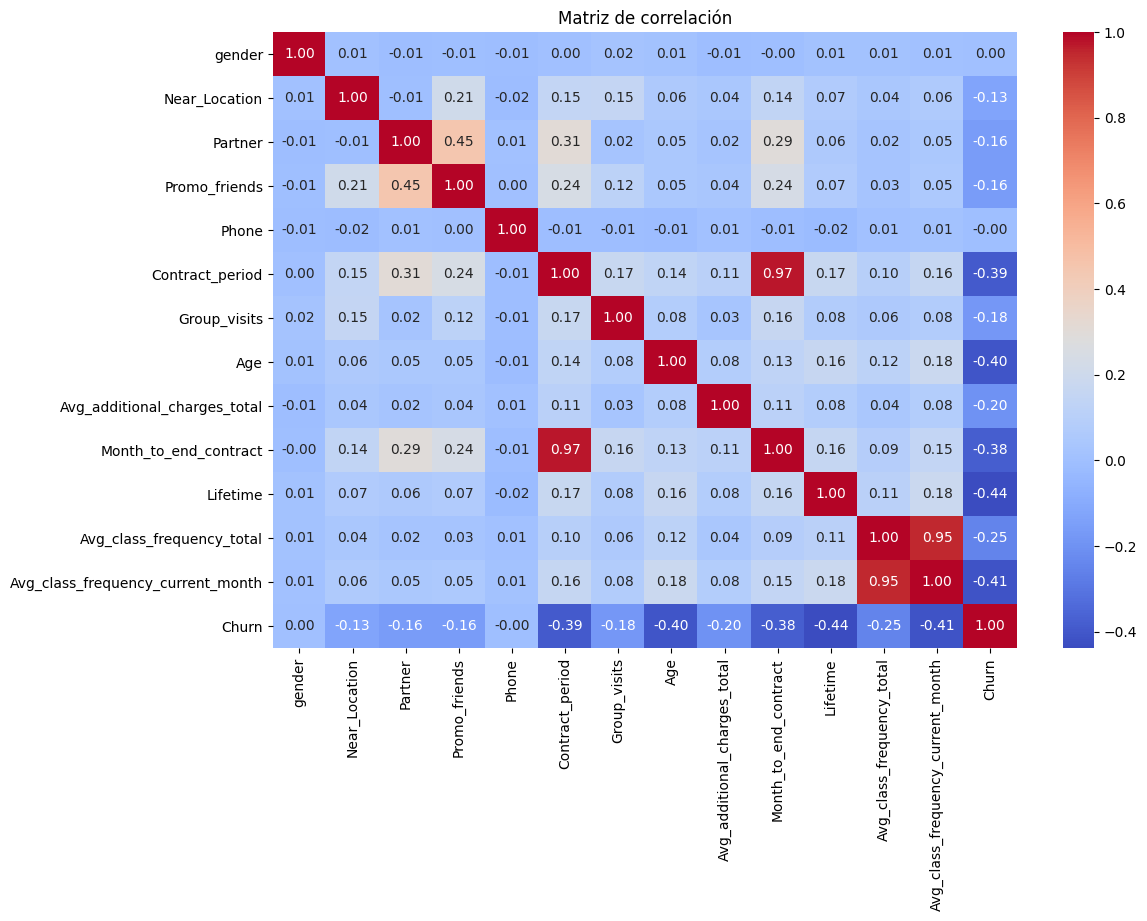

In [5]:
#Crea una matriz de correlación y muéstrala.
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

De este grafico obtenemos la siguiente informacion:

-Los usuarios que asisten con mas frecuencia en este mes parecen ser los mismos que los que acuden con mas frecuencia en general.

-Month_to_end_contract y contract_period miden aspectos similares, lo ideal seria elegir solo una de ellas al realizar un modelo.

-Parece ser que los usuarios con mas tiempo o los de mayor edad tienen menos probabilidades de abandonar.

-Partner y Promo_friends parecen tener cierta coorrelacion, sin embargo parece ser casualidad.

-Age y churn parecen tener cierta coorrelacion, deberia investigar mas al respecto.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Regresión logística
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_valid)

# Bosque aleatorio
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_valid)

print("Regresión logística:")
print("Accuracy:", accuracy_score(y_valid, log_pred))
print("Precision:", precision_score(y_valid, log_pred))
print("Recall:", recall_score(y_valid, log_pred))

print("\nBosque aleatorio:")
print("Accuracy:", accuracy_score(y_valid, rf_pred))
print("Precision:", precision_score(y_valid, rf_pred))
print("Recall:", recall_score(y_valid, rf_pred))

/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión logística:
Accuracy: 0.9241666666666667
Precision: 0.8840579710144928
Recall: 0.8052805280528053

Bosque aleatorio:
Accuracy: 0.9133333333333333
Precision: 0.8592057761732852
Recall: 0.7854785478547854


En este caso, la regresion logistica parece ser el mejor modelo.

Duda: En esta parte, a que se refiere el cuadro de error que aparece?.

<font size="6">Paso 4. Crear clústeres de usuarios/as</font>

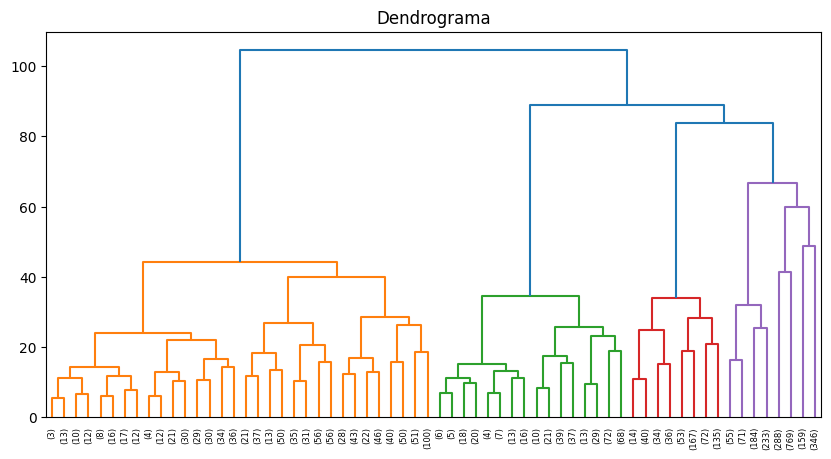

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

X_clust = df.drop('Churn', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)

# Dendrograma
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma')
plt.show()

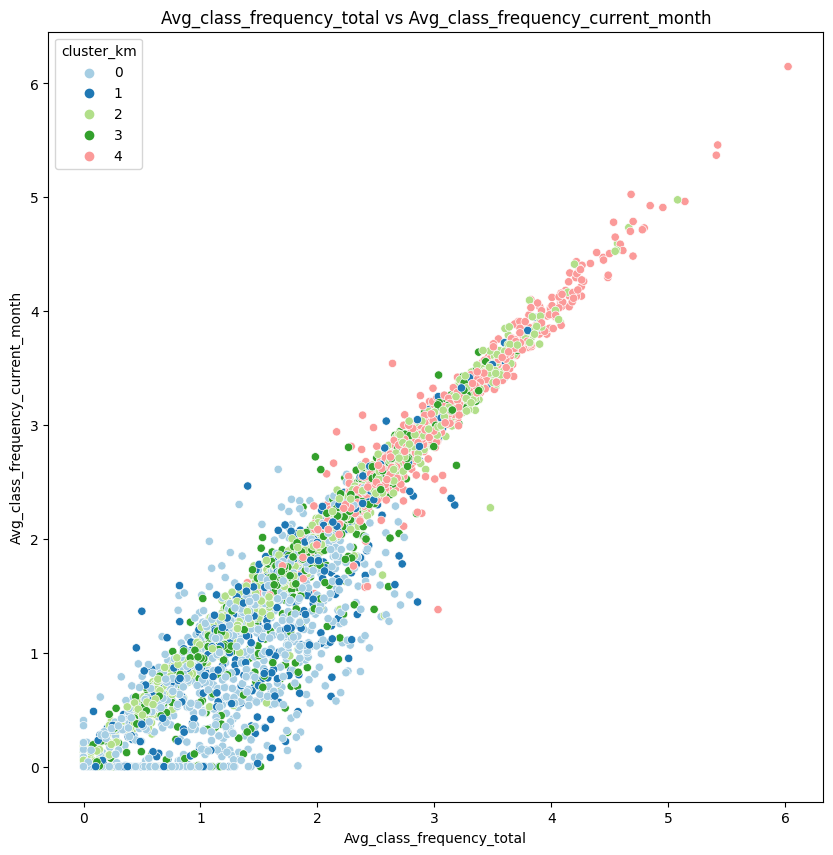

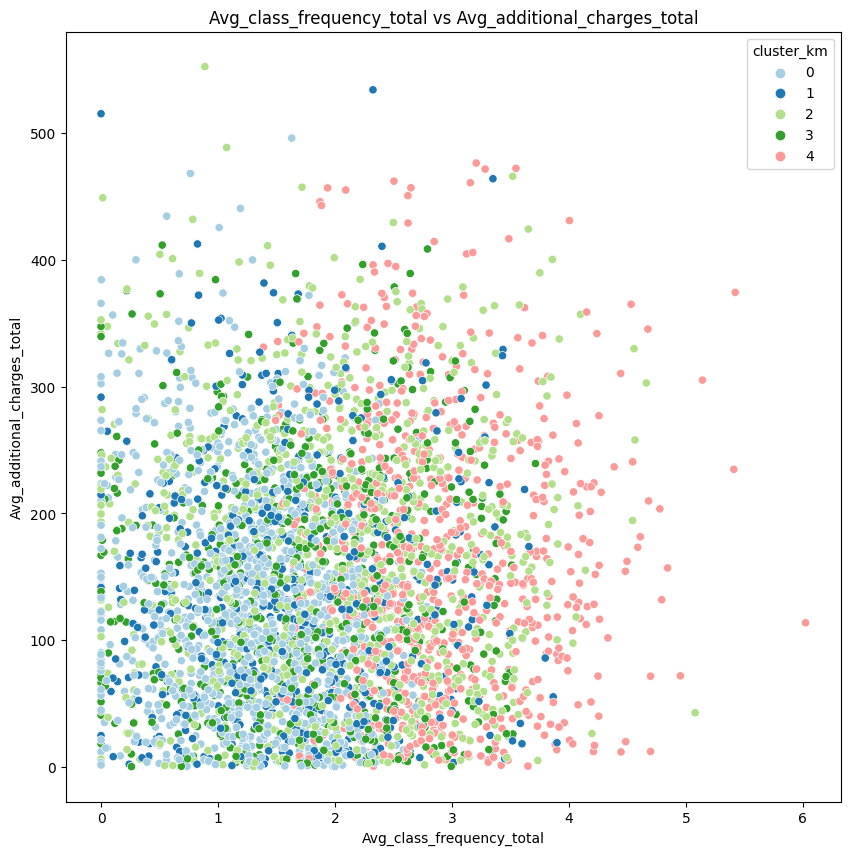

              gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.486878       1.000000  0.241629       0.020814  0.901357   
1           0.496324       0.000000  0.466912       0.077206  0.915441   
2           0.498932       0.944444  0.740385       0.485043  0.900641   
3           0.486862       0.998454  0.822257       1.000000  0.897991   
4           0.587240       0.971354  0.261719       0.088542  0.906250   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                  1.979186      0.320362  28.222624   
1                  2.209559      0.215074  28.483456   
2                 11.884615      0.551282  29.931624   
3                  3.162287      0.457496  29.234930   
4                  2.820312      0.476562  30.110677   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km 

In [8]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()
    
km = KMeans(n_clusters=5)
labels = km.fit_predict(X_scaled)

df['cluster_km'] = labels

cluster_means = df.groupby('cluster_km').mean()

show_clusters_on_plot(df,
                      'Avg_class_frequency_total',
                      'Avg_class_frequency_current_month',
                      'cluster_km')

# representa el gráfico para las características pareadas de "barra de jugos" y "restaurantes"
show_clusters_on_plot(df,
                      'Avg_class_frequency_total',
                      'Avg_additional_charges_total',
                      'cluster_km')

print(cluster_means)

-Todos los clusteres parecen tener mayor probabilidad de hacer gastos extras similares, aunque en especial el cluster 3 gasta un poco mas.

-Los usuarios del cluster 1 presentan una mayor frecuencia de asistencia frente al resto de los clusteres.

In [9]:
cancel_rates = df.groupby('cluster_km')['Churn'].mean().round(2)
for cluster, rate in cancel_rates.items():
    print(f'Clúster {cluster}: {rate * 100:.2f}%')

Clúster 0: 53.00%
Clúster 1: 45.00%
Clúster 2: 2.00%
Clúster 3: 25.00%
Clúster 4: 7.00%


Parece ser que los usuarios clusteres 2 y 4 tienen mayor probabilidad de abandonar el servicio, contrariamente a los clusters 1 y 3, que manejan probabilidades bastante bajas.

<font size="6">Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes</font>

-Se debe prestar especial atencion al riesgo de abandono por parte de los clusteres 2 y 4.

-Observar los usuarios con contratos cercanos a terminar asi como usuarios jovenes, pues parecen estar mas cercanos a abandonar el servicio. Quizas podrias incentivarlos de alguna manera. 

-Podriamos prestar atencion tambien a los usuarios que presenten pocas asistencias semanales, 'Por que no asisten mas seguido?'.

-Quizas se podria investigar en algun metodo para mejorar la retencion en el primer mes, pues gran parte de las cancelaciones ocurren en este.

Lamento si mis conclusiones no son tan extensas como deberian, pero me encuentro un poco presionado por terminar este proyecto para poder continuar con el siguiente, estare atento a cualquier correccion que tenga que realizar.

Agradezco que se coloco un ejemplo de proyecto en discord, pues fue de gran apoyo para darme una idea de lo que se estaba pidiendo.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Te felicito por las conclusiones planteadas luego de ver los resultados de la segmentación utilizando los cluster, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>